<a href="https://colab.research.google.com/github/lletridung/baitapai/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

169001437/169001437 [==============================] - 4s 0us/step


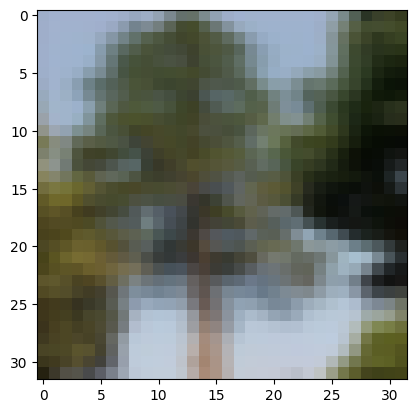

['hinh:', array([[[158, 174, 201],
        [161, 177, 206],
        [162, 177, 206],
        ...,
        [ 57,  64,  42],
        [ 61,  67,  39],
        [ 53,  59,  31]],

       [[159, 174, 202],
        [162, 178, 206],
        [161, 178, 206],
        ...,
        [ 68,  77,  48],
        [ 68,  77,  44],
        [ 64,  72,  38]],

       [[159, 174, 202],
        [161, 178, 206],
        [160, 179, 206],
        ...,
        [ 46,  55,  30],
        [ 53,  62,  33],
        [ 57,  67,  35]],

       ...,

       [[ 73,  68,  37],
        [ 74,  70,  37],
        [ 77,  72,  38],
        ...,
        [ 91,  94,  36],
        [ 91,  93,  35],
        [ 83,  84,  31]],

       [[ 59,  54,  28],
        [ 64,  58,  31],
        [ 73,  67,  39],
        ...,
        [ 95,  99,  39],
        [ 92,  96,  36],
        [ 80,  82,  30]],

       [[ 37,  33,  16],
        [ 60,  56,  42],
        [ 83,  80,  70],
        ...,
        [ 63,  65,  25],
        [ 65,  67,  24],
        [ 67, 

In [2]:
digit=x_train[2000]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print((['hinh:',x_train[2000]]))

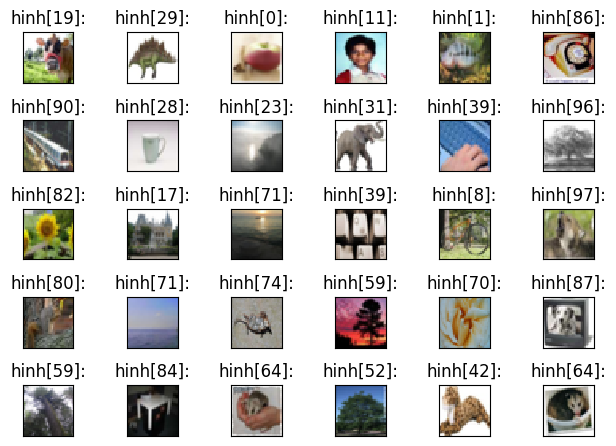

In [3]:
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('hinh{}:'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [4]:

model = Sequential()
model.add(Dense(10000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(2000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10000)             30730000  
                                                                 
 dense_1 (Dense)             (None, 2000)              20002000  
                                                                 
 dense_2 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_3 (Dense)             (None, 500)               500500    
                                                                 
 dense_4 (Dense)             (None, 100)               50100     
                                                                 
Total params: 53,283,600
Trainable params: 53,283,600
Non-trainable params: 0
_________________________________________________________________


In [5]:
x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,32*32*3)
x_test=x_test.astype('float32')/255

In [6]:
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

In [7]:
print('x_train : ',x_train.shape)
print('y_train :',y_train.shape)
print('x_test : ',x_test.shape)
print('y_test : ',y_test.shape)

x_train :  (50000, 3072)
y_train : (50000, 100)
x_test :  (10000, 3072)
y_test :  (10000, 100)


In [8]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('mất mát:',test_loss)
print('Độ chính xác:',test_acc)

Epoch 1/10
391/391 [==============================] - 12s 15ms/step - loss: 4.4844 - accuracy: 0.0413
Epoch 2/10
391/391 [==============================] - 6s 14ms/step - loss: 3.9958 - accuracy: 0.0813
Epoch 3/10
391/391 [==============================] - 6s 15ms/step - loss: 3.7904 - accuracy: 0.1152
Epoch 4/10
391/391 [==============================] - 6s 14ms/step - loss: 3.6307 - accuracy: 0.1434
Epoch 5/10
391/391 [==============================] - 6s 15ms/step - loss: 3.5207 - accuracy: 0.1616
Epoch 6/10
391/391 [==============================] - 6s 15ms/step - loss: 3.4149 - accuracy: 0.1821
Epoch 7/10
391/391 [==============================] - 6s 14ms/step - loss: 3.3297 - accuracy: 0.1959
Epoch 8/10
391/391 [==============================] - 7s 17ms/step - loss: 3.2406 - accuracy: 0.2115
Epoch 9/10
391/391 [==============================] - 6s 15ms/step - loss: 3.1680 - accuracy: 0.2254
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 3.5786 - accura

In [9]:
model.save('test2.h5')